In [168]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Programming Exercise 1: Linear Regression

In this exercise, you will implement linear regression and get to see it work on data. Before starting on this programming exercise, we strongly recom- mend watching the video lectures and completing the review questions for the associated topics.
To get started with the exercise, you will need to download the starter code and unzip its contents to the directory where you wish to complete the exercise. If needed, use the cd command in Octave/MATLAB to change to this directory before starting this exercise.
You can also find instructions for installing Octave/MATLAB in the “En- vironment Setup Instructions” of the course website.

## Linear Regression with One Variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

In [169]:
filename = "data/ex1data1.txt"
data = np.loadtxt(filename, delimiter = ",", usecols=(0,1), unpack = True)

# Define training epochs (iterations) and step size (alfa) 
iterations = 1500
alfa = 0.0001
stepsize = 100

# Define X and y arrays
Xtr = np.asarray(data[:-1])[0]
ytr = np.asarray(data[-1:])[0]
theta = tf.Variable(0.0, name = "theta")
m = Xtr.size

In [170]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [171]:
pred = tf.mul(X,theta)
cost = tf.reduce_sum(tf.pow(pred-Y,2))/(2*m)

In [172]:
optim = tf.train.GradientDescentOptimizer(alfa).minimize(cost)
init = tf.initialize_all_variables()

In [173]:
sess = tf.Session()
sess.run(init)
initCost = sess.run(cost, feed_dict={X:Xtr, Y:ytr})

print("Cost computed with theta initialized to zeros: ","{:.04f}".format(initCost) )

Cost computed with theta initialized to zeros:  32.0727


Iter: 0 => Theta: 0.00650368
Iter: 100 => Theta: 0.449636
Iter: 200 => Theta: 0.645956
Iter: 300 => Theta: 0.732934
Iter: 400 => Theta: 0.771466
Iter: 500 => Theta: 0.788537
Iter: 600 => Theta: 0.7961
Iter: 700 => Theta: 0.799451
Iter: 800 => Theta: 0.800934
Iter: 900 => Theta: 0.801596
Iter: 1000 => Theta: 0.80188
Iter: 1100 => Theta: 0.802
Iter: 1200 => Theta: 0.802046
Iter: 1300 => Theta: 0.802075
Iter: 1400 => Theta: 0.802087
Optimization finished!
Theta: 0.802093
Accuracy of weights:  31.23 %


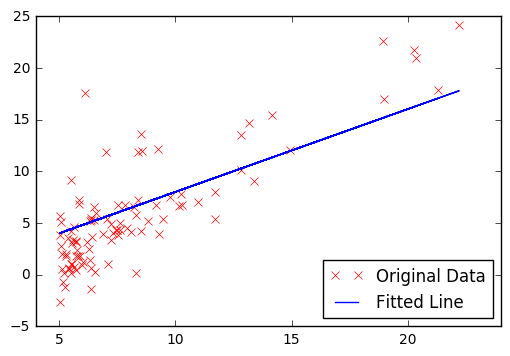


Predictions for profits in areas of 35000 and 70000 people, respectively: $ 28073.25 ; $ 56146.50


In [174]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(iterations):
        for (x,y) in zip(Xtr, ytr):
            sess.run(optim, feed_dict={X:x, Y:y})
        if (i)%stepsize == 0:
            print("Iter:", i, "=> Theta:", sess.run(theta))
    print("Optimization finished!")
    print("Theta:", sess.run(theta)) 
    acc = ((1.166362-sess.run(theta))/1.166362)*100
    print("Accuracy of weights: ", "{:.02f}".format(acc), "%")
    
    
    plt.plot(Xtr, ytr, 'rx', label="Original Data")
    plt.plot(Xtr, sess.run(theta)*Xtr, label="Fitted Line")
    plt.xlabel('Population of cities in 10000s')
    plt.ylabel('Profit in $10000s')
    plt.axis([4,24,-5,25])
    plt.legend(loc="lower right")
    plt.show()
            
            
    predict1 = sess.run(theta)*3.5*10000
    predict2 = sess.run(theta)*7.*10000

    print("\nPredictions for profits in areas of 35000 and 70000 people, respectively: $", "{:.02f}".format(predict1), "; $", "{:.02f}".format(predict2))